In [31]:
#importations
from matplotlib import pyplot as plt
import numpy as np
#import os; os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import cv2
import glob
import pydot
from IPython.display import SVG
import random

In [32]:
NUMBER_OF_CLASSES = 14
CLASSES = ("-", "+", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "*", "x")
TRAINING_IMAGES_PER_CLASS = 5000
EPOCHS = 10

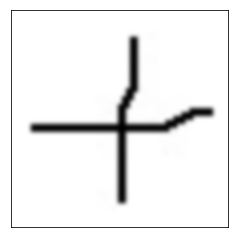

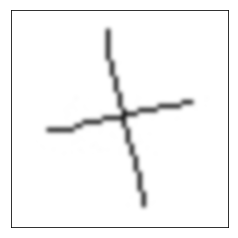

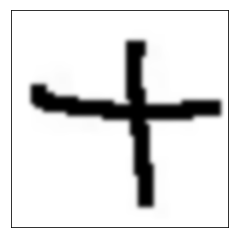

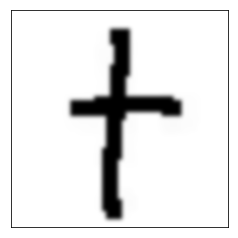

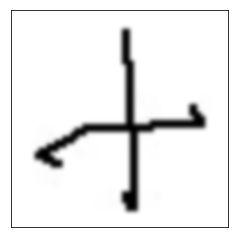

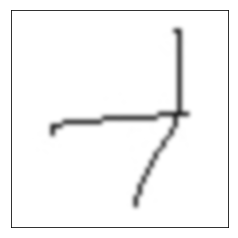

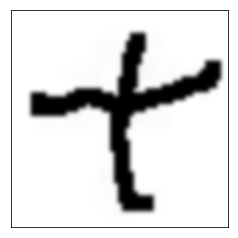

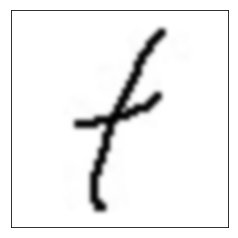

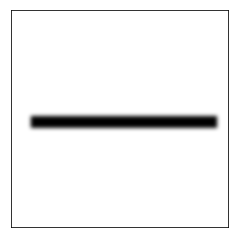

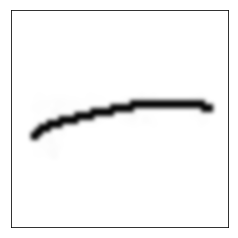

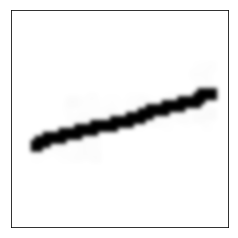

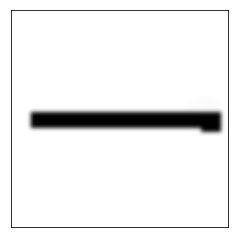

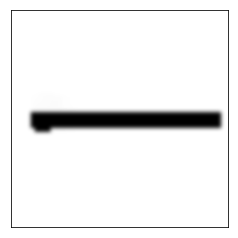

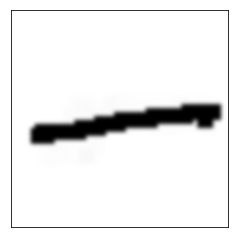

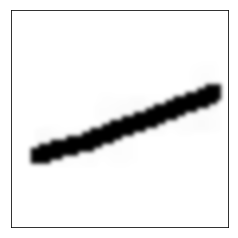

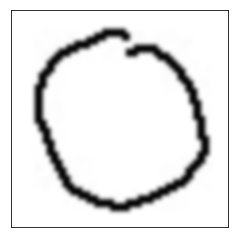

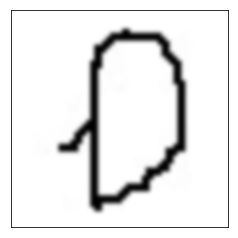

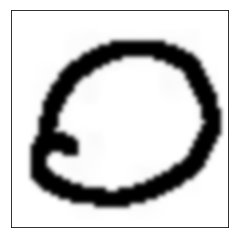

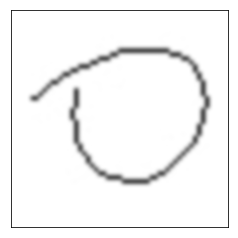

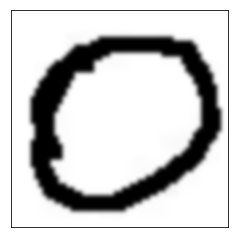

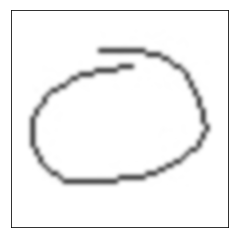

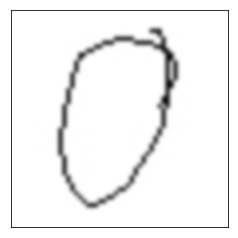

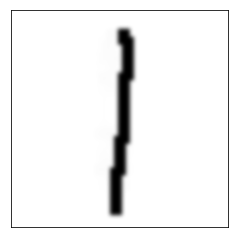

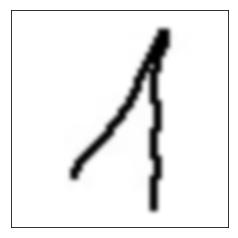

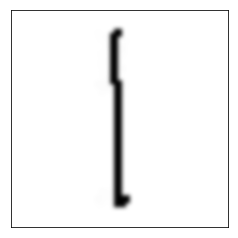

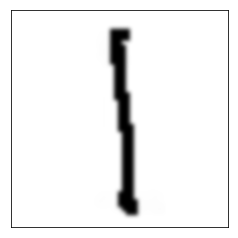

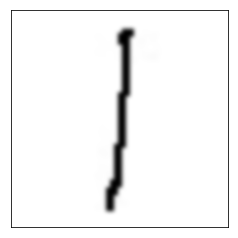

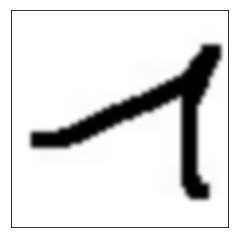

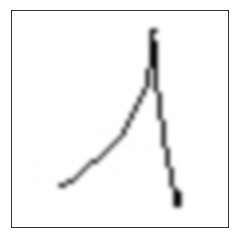

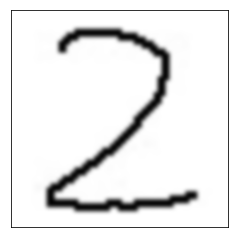

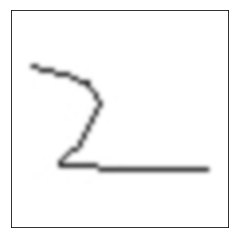

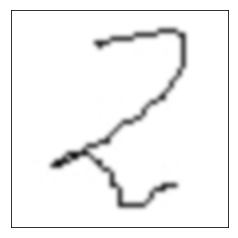

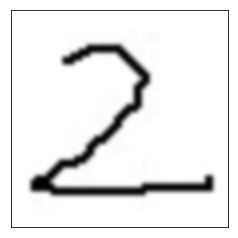

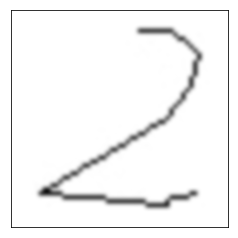

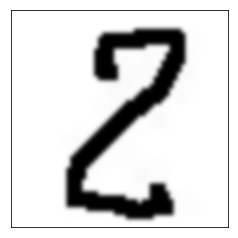

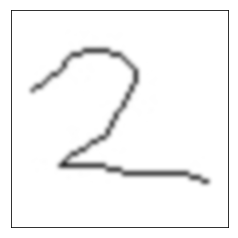

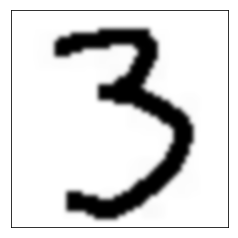

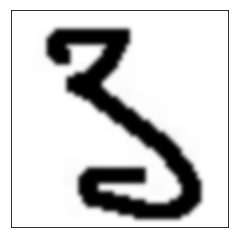

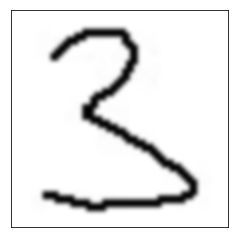

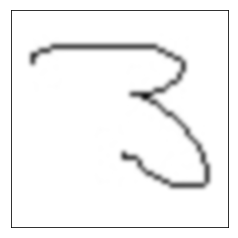

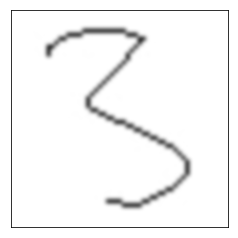

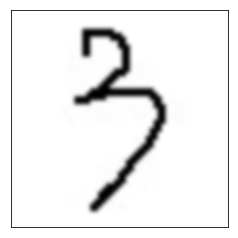

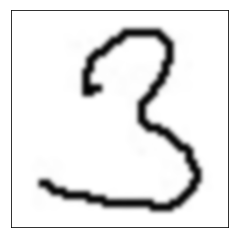

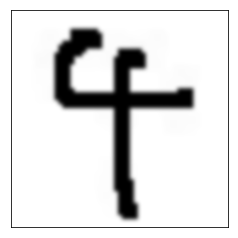

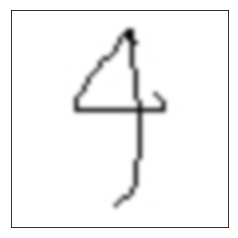

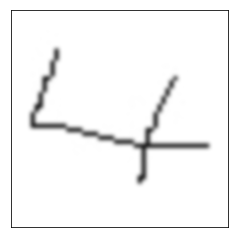

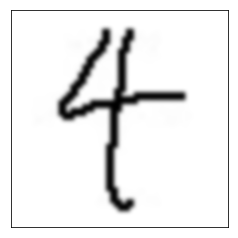

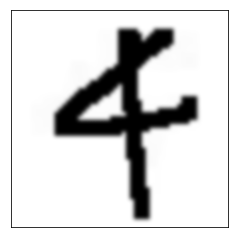

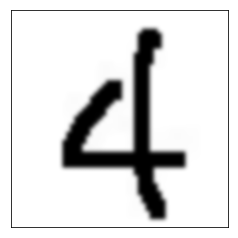

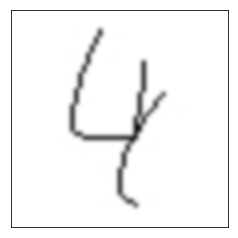

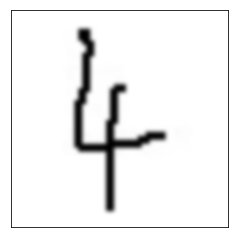

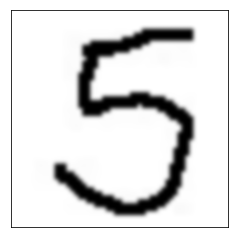

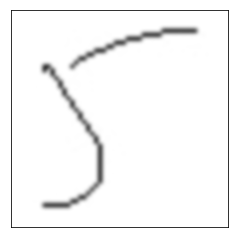

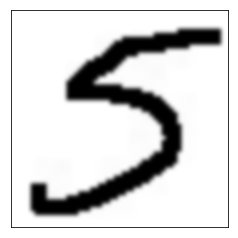

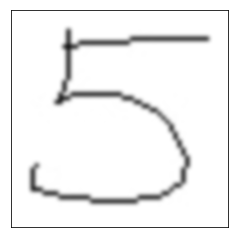

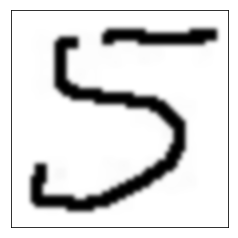

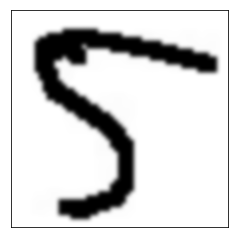

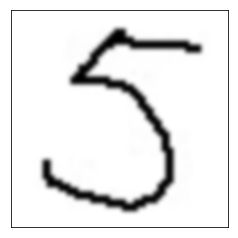

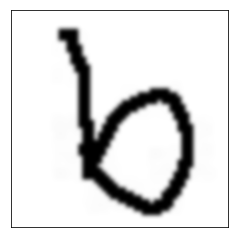

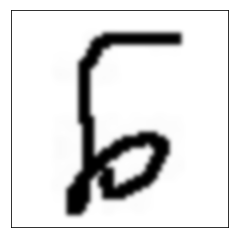

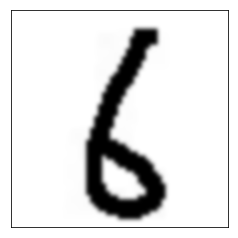

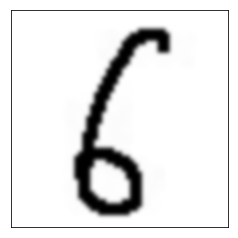

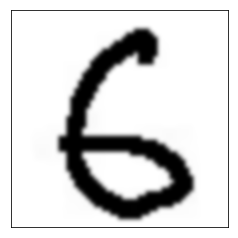

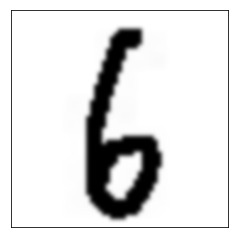

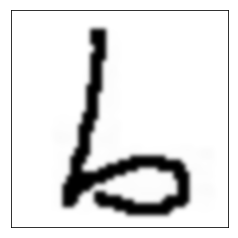

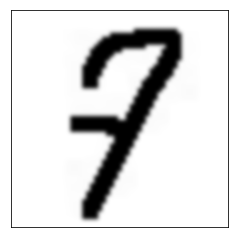

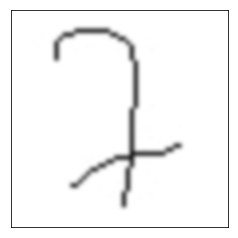

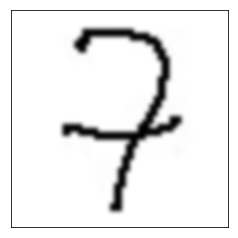

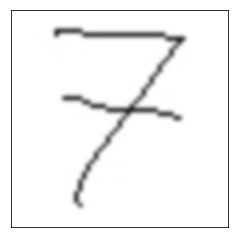

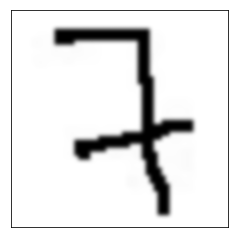

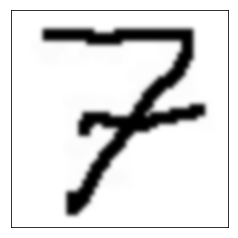

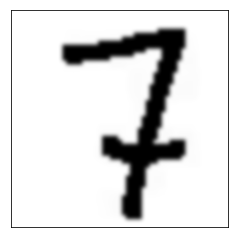

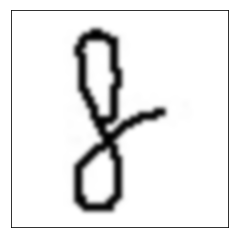

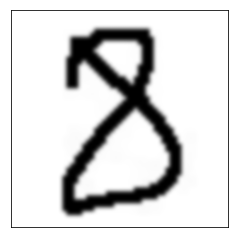

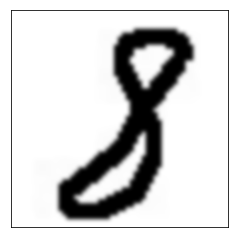

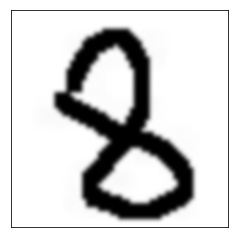

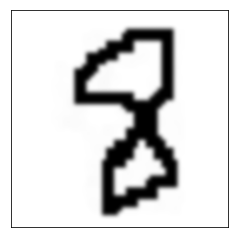

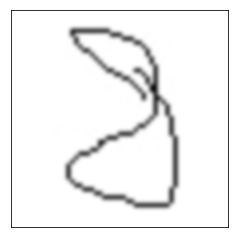

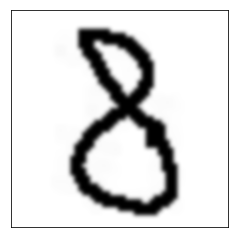

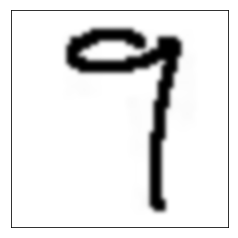

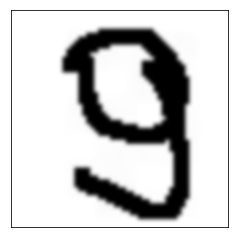

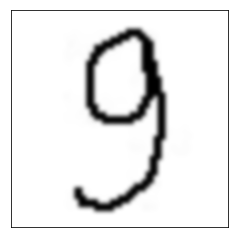

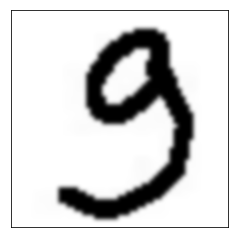

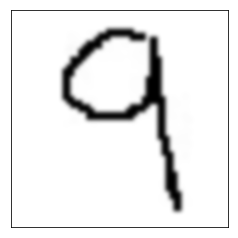

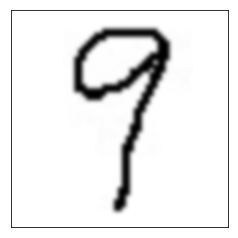

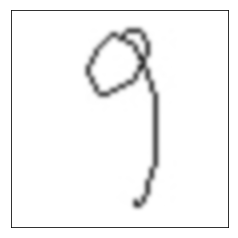

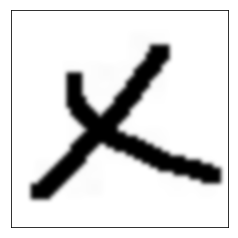

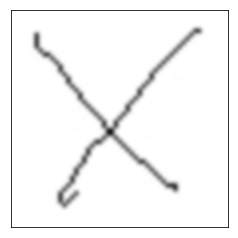

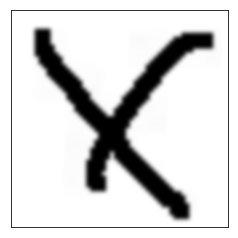

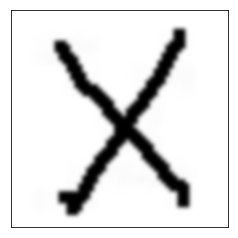

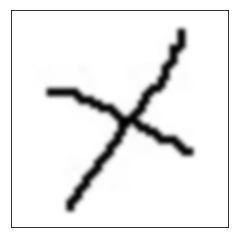

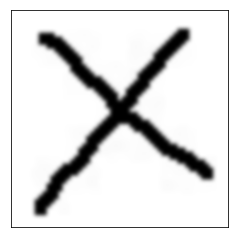

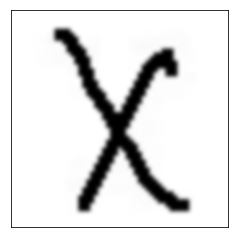

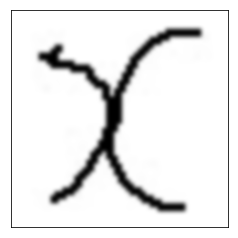

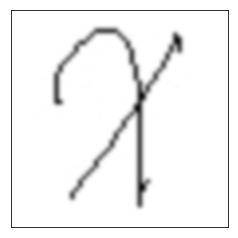

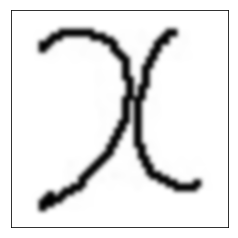

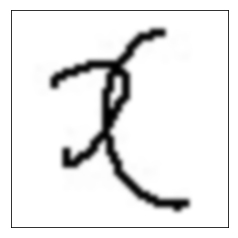

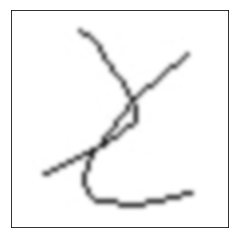

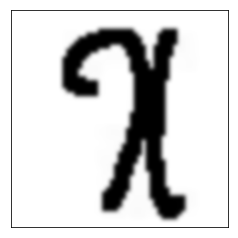

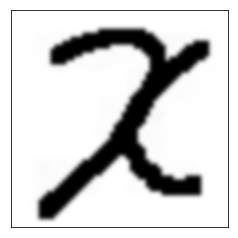

(70000, 55, 55, 1)
(70000, 14)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [33]:
pathTrain = "sample/Train/*"
pathTest = "sample/Test/*"

def readThenErode(file):
    image = cv2.imread(file, 0)
    image = cv2.copyMakeBorder(image,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255,255])
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image,kernel,iterations = random.randint(0,3))
    return image

X_Train = np.array([readThenErode(file) for file in glob.glob(pathTrain)])

for i in range(100):
    plt.imshow(X_Train[i*699], cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

X_Train = np.expand_dims(X_Train, axis=3)
X_Train = X_Train/255

X_Test = np.array([readThenErode(file) for file in glob.glob(pathTest)])
X_Test = np.expand_dims(X_Test, axis=3)
X_Test = X_Test/255

print(X_Train.shape)

j = 0
Y_Train = np.zeros((X_Train.shape[0], NUMBER_OF_CLASSES))
Y_Train[0][0] = 1
for i in range(1, X_Train.shape[0]):
    if i%TRAINING_IMAGES_PER_CLASS == 0:
        j = j + 1
    Y_Train[i][j] = 1

print(Y_Train.shape)
print(Y_Train)

In [34]:
def ProjectModel(input_shape):
    
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((2, 2))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv0')(X)
    X = Activation('relu')(X)

    # AVERAGEPOOL
    X = AveragePooling2D(pool_size = (2, 2), name='average_pool0')(X)
    
    # Zero-Padding
    X = ZeroPadding2D((2, 2))(X)
    
    # CONV -> RELU Block applied to X
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = Activation('relu')(X)

    # AVERAGEPOOL
    X = AveragePooling2D(pool_size = (2, 2), strides = (2, 2), name='average_pool1')(X)

    # FLATTEN X + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(120, activation='relu', name='fc0')(X)
    
    # FULLYCONNECTED
    X = Dense(84, activation='relu', name='fc1')(X)
    
    # FULLYCONNECTED (SOFTMAX)
    X = Dense(NUMBER_OF_CLASSES, activation='softmax', name='output')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='ProjectModel')

    return model

In [47]:
model = ProjectModel(X_Train.shape[1:])

In [48]:
model.compile("Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [46]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)
model.fit(x = X_Train, y = Y_Train, epochs = EPOCHS, callbacks=[early_stopping_callback])

Epoch 1/1
70000/70000 [==============================] - 202s 3ms/step - loss: 0.0137 - acc: 0.9960


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 55, 55, 1)         0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 59, 59, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 6)         156       
_________________________________________________________________
activation_5 (Activation)    (None, 55, 55, 6)         0         
_________________________________________________________________
average_pool0 (AveragePoolin (None, 27, 27, 6)         0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 31, 31, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 16)        2416      
__________

In [40]:
preds = model.predict(X_Test)

In [41]:
preds = (preds > 0.5).astype(int)
for i in preds:
    print(i)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0

In [27]:
preds = preds.tolist()
j = 0
for i in range(len(preds)):
    if i%10==0 and i!=0:
        j = j + 1
    print("Predicted : " + CLASSES[preds[i].index(1)] +" / Real : "+ CLASSES[j])

Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : - / Real : -
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : + / Real : +
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 0 / Real : 0
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 1 / Real : 1
Predicted : 2 / Real : 1
Predicted : 1 / Real : 1


IndexError: tuple index out of range

In [42]:
from keras.models import load_model

model.save('digit_model.h5')  # creates a HDF5 file 'my_model.h5'